## Import các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## Thu thập dữ liệu

Trong bài này, ta sẽ dùng dữ liệu đã được thu thập sẵn là file "energy_consuming.xlsx" đính kèm. Khảo sát về nhà ở, tiêu thụ năng lượng và tân trang lại ở Việt Nam. Dữ liệu gốc được lấy từ [trang này](https://data.4tu.nl/articles/dataset/Survey_of_housing_energy_consumption_and_refurbishment_in_Vietnam_/13109924?fbclid=IwAR3q7YooDTsjJyqCC2Q-Rp8PikwhPqfIZUxApVHCmEDWGOauAdEkHm8-_R0).

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [ ]:
df = pd.read_excel('energy_consuming.xlsx')
df

,Timestamp,Climatic region,Ownership,Number of occupants,House age,House typology,Function other than residential,Number of floor,Total floor area,summer daylight,...,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,Solar hotwater,Energy efficiency equipment,total energy consumption,energy per person,Unnamed: 25
0,2016-06-10 17:15:18.688,North,shared rent,4,5.0,Attached row house,No,3,110.0,4,...,100000.0,440000.0,100000.0,0,1,No,Yes,540000,135000.000000,NaN
1,2016-06-11 01:18:32.630,Center,privately own,6,5.0,Detached house,No,5,180.0,4,...,375000.0,1800000.0,1800000.0,5,5,Yes,No,2175000,362500.000000,NaN
2,2016-06-13 13:11:38.808,North,privately rent,4,5.0,Attached row house,No,3,30.0,5,...,100000.0,240000.0,240000.0,0,1,No,No,340000,85000.000000,NaN
3,2016-06-14 12:35:00.366,North,privately rent,1,5.0,Attached row house,No,5,30.0,4,...,100000.0,100000.0,100000.0,0,0,No,No,200000,200000.000000,NaN
4,2016-06-13 13:33:24.572,North,privately own,7,5.0,Attached row house,office,5,240.0,4,...,NaN,1800000.0,1330000.0,5,5,No,Yes,1800000,257142.857143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2016-06-24 08:53:22.405,North,privately own,4,15.0,Attached row house,No,2,70.0,4,...,100000.0,675000.0,100000.0,1,2,No,Yes,775000,193750.000000,NaN
149,2016-06-21 10:29:26.684,North,privately own,3,5.0,Attached row house,No,4,180.0,4,...,NaN,1330000.0,930000.0,1,1,Yes,Yes,1330000,443333.333333,NaN
150,2016-06-30 15:59:18.096,South,privately rent,2,5.0,Apartment,No,1,110.0,2,...,100000.0,675000.0,240000.0,3,2,No,No,775000,387500.000000,NaN
151,2016-07-10 08:56:42.390,North,privately own,2,5.0,Attached row house,No,2,180.0,3,...,100000.0,240000.0,100000.0,1,1,Yes,Yes,340000,170000.000000,NaN


In [ ]:
# Xóa cột dư thừa
del df['Unnamed: 25']

### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [ ]:
print('Số dòng: ',df.shape[0])
print('Số cột: ',df.shape[1])

Số dòng:  153
Số cột:  25


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
- Mỗi dòng dữ liệu thể hiện thông tin về khu vực khí hậu, quyền sở hữu, số cư dân, kiểu dáng, ... của ngôi nhà cùng với những đánh giá về điều kiện ánh sáng và nhiệt độ trong nhà vào những ngày hè và ngày đông. Ngoài ra còn có thông tin về nguồn năng lượng sử dụng và lượng năng lượng đã tiêu thụ và các thiết bị điện liên quan.
- Không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

In [ ]:
num_duplicated_rows = df.duplicated().sum()
if num_duplicated_rows == 0:
    print('Không có dòng nào bị lặp')
else:
    print('Có {} dòng bị lặp'.format(num_duplicated_rows))

Không có dòng nào bị lặp


### Mỗi cột có ý nghĩa gì?

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [ ]:
df.dtypes

Timestamp                             datetime64[ns]
Climatic region                               object
Ownership                                     object
Number of occupants                            int64
House age                                    float64
House typology                                object
Function other than residential               object
Number of floor                                int64
Total floor area                             float64
summer daylight                                int64
summer thermal comfort                         int64
summer natural ventilation                     int64
Winter daylight                                int64
Winter thermal comfort                         int64
Winter natural ventilation                     int64
Source of energy                              object
Gas consumption                              float64
maximum electricity consumption              float64
minimum electricity consumption              f

**Cột có dtype là object nghĩa là sao?**

In [ ]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes

In [ ]:
cate_col_df = df.select_dtypes(include='object').columns
type_col = []
for col in cate_col_df:
    type_col.append(open_object_dtype(df[col]))
pd.DataFrame({'Column':cate_col_df, 'Type':type_col})

,Column,Type
0,Climatic region,{<class 'str'>}
1,Ownership,{<class 'str'>}
2,House typology,{<class 'str'>}
3,Function other than residential,{<class 'str'>}
4,Source of energy,{<class 'str'>}
5,Solar hotwater,{<class 'str'>}
6,Energy efficiency equipment,{<class 'str'>}


Các cột có vẻ như đã có kiểu dữ liệu hợp lý.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Với các cột này, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

In [ ]:
num_col_df = df.select_dtypes(exclude='object').columns
num_df = df[num_col_df]
def missing_ratio(s):
    return (s.isna().mean() * 100)
def median(df):
    return df.quantile(0.5)
def lower_quartile(df):
    return df.quantile(0.25)
def upper_quartile(df):
    return df.quantile(0.75)
num_col_info_df = num_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])
num_col_info_df

,Timestamp,Number of occupants,House age,Number of floor,Total floor area,summer daylight,summer thermal comfort,summer natural ventilation,Winter daylight,Winter thermal comfort,Winter natural ventilation,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,total energy consumption,energy per person
missing_ratio,0.0,0.0,1.960784,0.0,4.575163,0.0,0.0,0.0,0.0,0.0,0.0,36.601307,1.307190e+00,1.307190e+00,0.0,0.0,0.0,0.000000e+00
min,2016-06-10 17:15:18.688000,1.0,5.000000,1.0,30.000000,1.0,1.0,1.0,1.0,1.0,1.0,100000.000000,1.000000e+05,1.000000e+05,0.0,0.0,0.0,0.000000e+00
lower_quartile,2016-06-13 18:02:21.192999936,3.0,5.000000,2.0,70.000000,3.0,2.0,3.0,3.0,3.0,3.0,100000.000000,4.400000e+05,2.400000e+05,1.0,1.0,540000.0,1.700000e+05
median,2016-06-14 11:13:50.700999936,4.0,10.000000,3.0,110.000000,4.0,3.0,3.0,3.0,3.0,3.0,225000.000000,9.300000e+05,4.400000e+05,2.0,1.0,930000.0,2.583333e+05
upper_quartile,2016-06-14 16:44:46.217999872,5.0,15.000000,4.0,180.000000,4.0,4.0,4.0,4.0,4.0,4.0,375000.000000,1.330000e+06,6.750000e+05,3.0,2.0,1555000.0,3.600000e+05
max,2016-07-26 06:06:51.481000,7.0,35.000000,5.0,240.000000,5.0,5.0,5.0,5.0,5.0,5.0,675000.000000,1.800000e+06,1.800000e+06,5.0,5.0,2475000.0,1.455000e+06


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Với các cột này ta sẽ tính:
- Tỉ lệ % giá trị thiếu (từ 0 đến 100)
- Số lượng giá trị khác nhau
- List các giá trị khác nhau

In [ ]:
cate_col_df = df.select_dtypes(include='object').columns
cate_df = df[cate_col_df]
def missing_ratio(s):
    return (s.isna().mean() * 100)
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

cate_col_profiles_df = cate_df.agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,Climatic region,Ownership,House typology,Function other than residential,Source of energy,Solar hotwater,Energy efficiency equipment
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,3,4,4,3,2,2,2
diff_vals,"[North, Center, South]","[shared rent, privately own, privately rent, o...","[Attached row house, Detached house, Apartment...","[No, office, Commercial]","[Electricity and gas, Electricity]","[No, Yes]","[Yes, No]"


## Trực quan

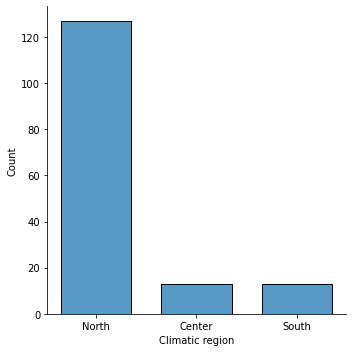

In [ ]:
sns.displot(df, x='Climatic region', shrink=.7);

Phần lớn dữ liệu được thu thập có **Climatic region** là **North**

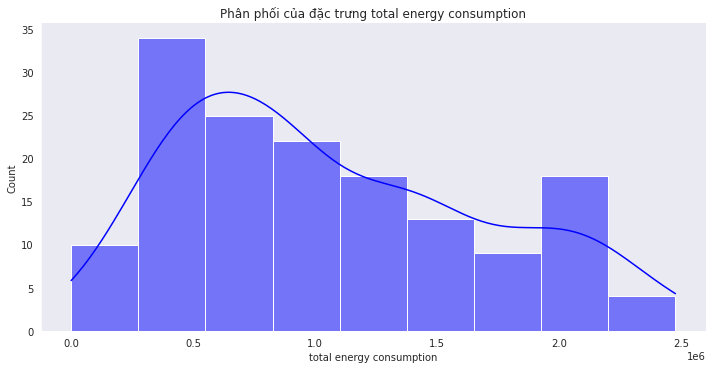

In [ ]:
# Trực quan hóa phân bố dữ liệu total energy consumption
sns.set_style("dark")
ax = sns.displot(df, x='total energy consumption', kde = True, color='b', height=5, aspect=2)
plt.title('Phân phối của đặc trưng total energy consumption')
plt.show()

Nhận xét: Histogram bị lệch về phía bên trái. Total energy consumption thấp chiếm tần suất nhiều hơn

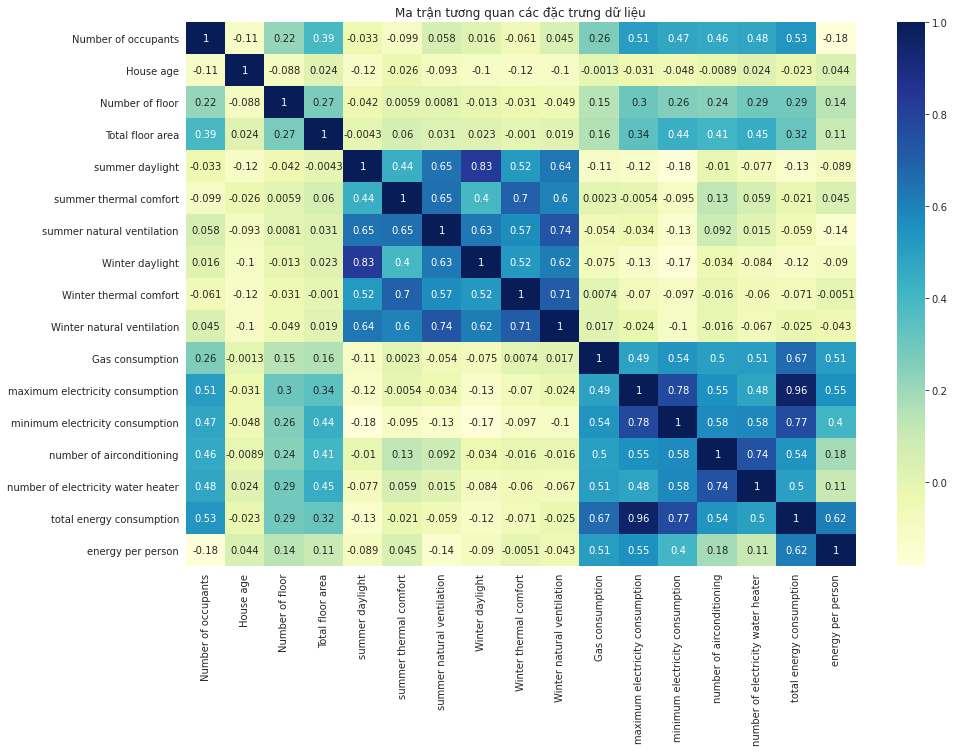

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Ma trận tương quan các đặc trưng dữ liệu')
plt.show()

Có hai nhóm tương quan cao với nhau:
* Nhóm 1: Gồm các cột 'summer daylight', 'summer thermal comfort','summer natural ventilation', 'Winter daylight', 'Winter thermal comfort', 'Winter natural ventilation'
* Nhóm 2: Gồm các cột 'Gas consumption', 'maximum electricity consumption', 'minimum electricity consumption', 'number of airconditioning', 'number of electricity water heater', 'total energy consumption', 'energy per person'

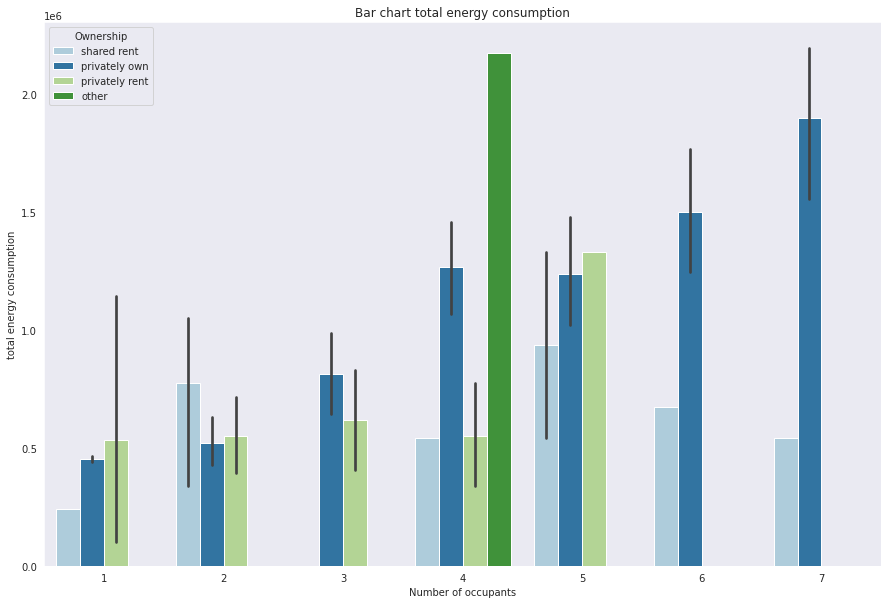

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.barplot(x='Number of occupants', y='total energy consumption', hue='Ownership', data=df, palette='Paired')
plt.title('Bar chart total energy consumption')
plt.show()

* Những gia đình đông người (6, 7 người) gần như không ở thuê (privately rent).
* Những gia đình ở nhà sở hữu tư nhân (privately own) thường có lượng năng lượng tiêu thụ cao.
* Những người ở chung 2 người thì loại shared rent thường có lượng năng lượng tiêu thụ cao hơn các loại khác.

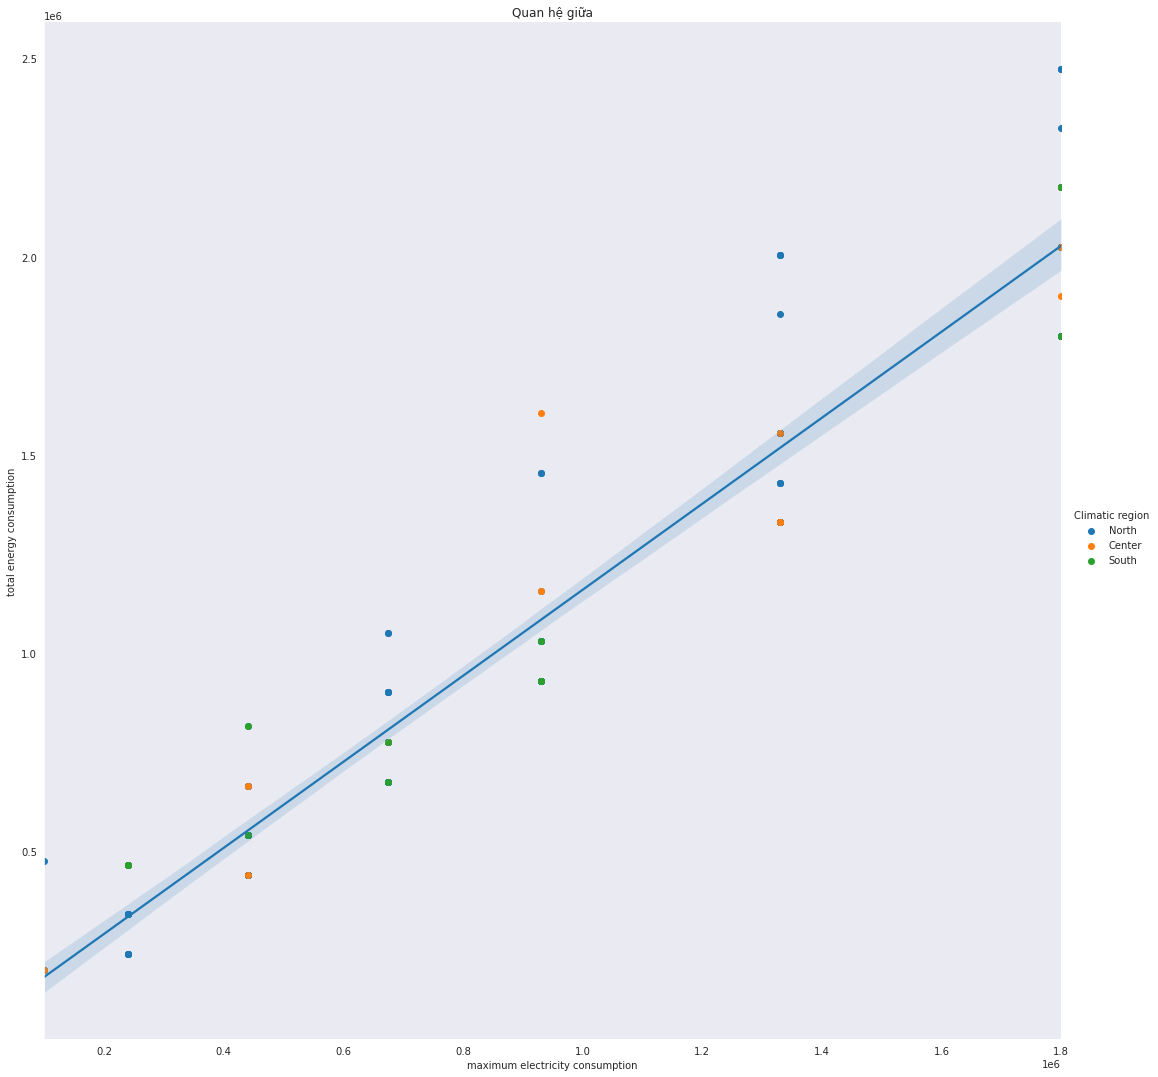

In [ ]:
sns.FacetGrid(df, hue="Climatic region", height=15).map(plt.scatter, "maximum electricity consumption",
                                                        "total energy consumption").add_legend()
sns.regplot(x="maximum electricity consumption", y="total energy consumption", data=df, scatter=False,)
plt.title('Quan hệ giữa')
plt.show()

**maximum electricity consumption** và **total energy consumption** có mối quan hệ tuyến tính, do đó ta có thể vẽ ra một đường dự đoán hồi quy

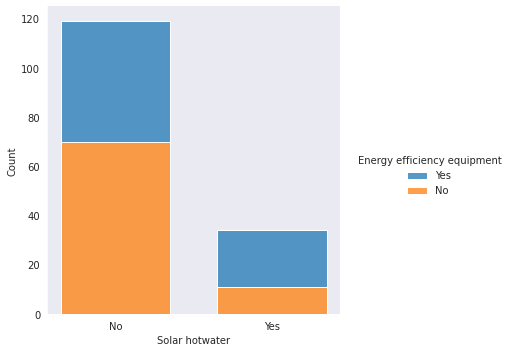

In [ ]:
sns.displot(df, x='Solar hotwater', shrink=.7, hue = 'Energy efficiency equipment', multiple='stack');

* Đa số đều không có Solar hotwater
* Nếu có Solar hotwater thì khả năng cao sẽ có Energy efficiency equipment

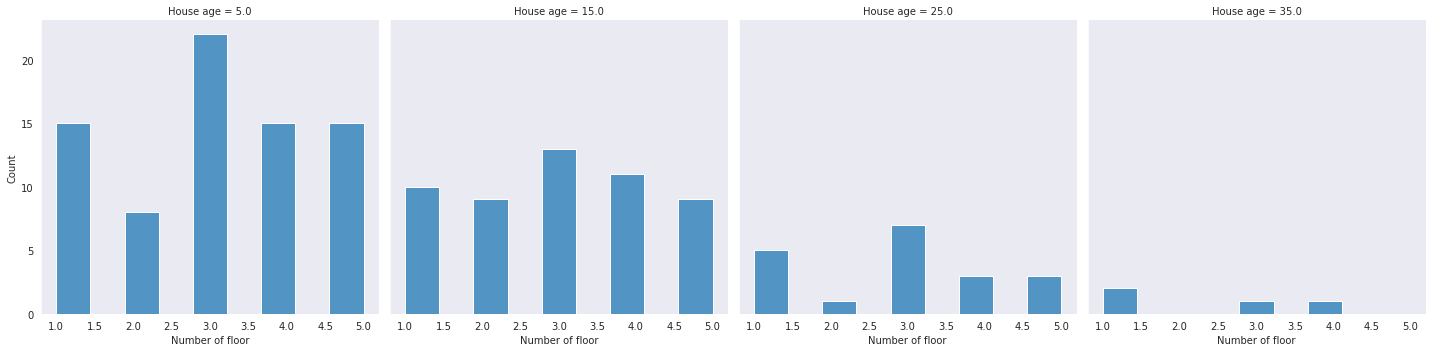

In [ ]:
sns.displot(df, x="Number of floor", col="House age", multiple="dodge");

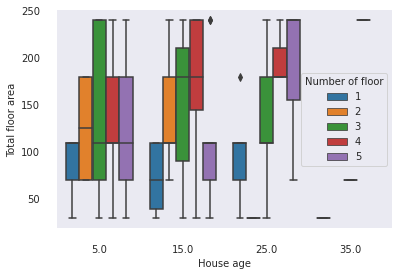

In [ ]:
sns.boxplot(x="House age", y="Total floor area",
            hue="Number of floor",
            data=df)
sns.despine(offset=10, trim=True)

Nhận xét:
   * Những ngôi nhà 5 năm tuổi có diện tích lớn thường là nhà 3 tầng
   * Những ngôi nhà 15 năm tuổi có diện tích lớn thường là nhà 4 tầng
   * Những ngôi nhà 25 năm tuổi có diện tích lớn thường là nhà 5 tầng
   
Điều này cho thấy xu hướng xây nhà thay đổi theo thời gian. Ngày xưa, khi muốn có diện tích sử dụng lớn người ta thường xây nhà cao tầng. Ngày nay, ta thường ưa chuộng nhà 3 tầng hơn.

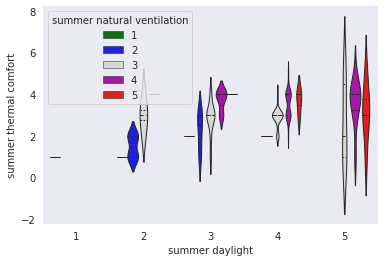

In [ ]:
sns.violinplot(data=df, x="summer daylight", y="summer thermal comfort", hue="summer natural ventilation",
               inner="quart", linewidth=1,  palette={'.85','r','g','b','m'})
sns.despine(left=True)

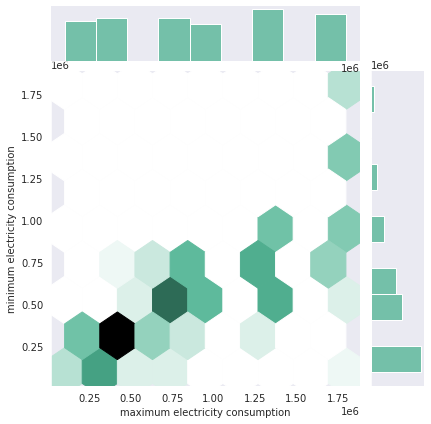

In [ ]:
sns.jointplot(data = df, x='maximum electricity consumption', y="minimum electricity consumption",
              kind="hex", color="#4CB391");

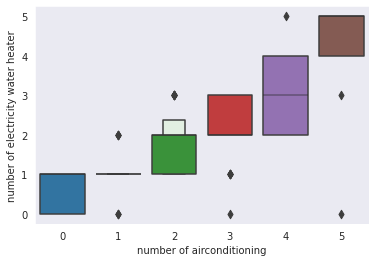

In [ ]:
sns.boxenplot(x="number of airconditioning", y="number of electricity water heater",
              scale="linear", data=df);

* Gia đình sở hữu số lượng airconditioning càng cao thì thường lượng electricity water heater cũng càng cao.
* Gia đình không có airconditioning thì cũng sẽ chỉ có tối đa 1 electricity water heater

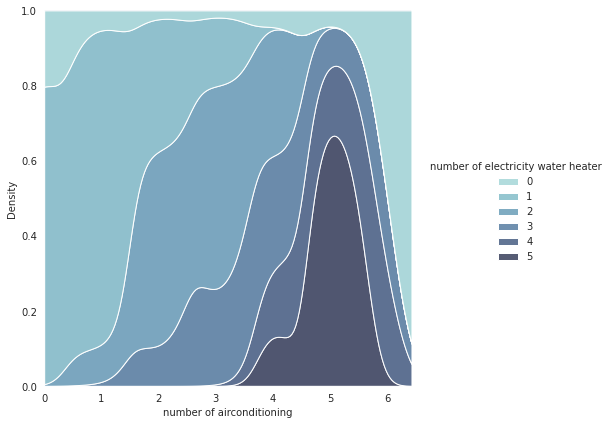

In [ ]:
sns.displot(
    data=df,
    x="number of airconditioning", hue="number of electricity water heater",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
);

In [ ]:
tmpdf = df[["Timestamp","number of airconditioning","number of electricity water heater"]]
tmpdf = tmpdf.groupby(["number of airconditioning","number of electricity water heater"], as_index = False).count()
tmpdf.set_index(["number of airconditioning","number of electricity water heater"]).unstack(level = 0)

Timestamp                            
number of airconditioning                  0     1     2     3    4    5
number of electricity water heater                                      
0                                        6.0   3.0   NaN   1.0  NaN  1.0
1                                       10.0  36.0  16.0   5.0  NaN  NaN
2                                        NaN   4.0  24.0  15.0  3.0  NaN
3                                        NaN   NaN   6.0   9.0  3.0  1.0
4                                        NaN   NaN   NaN   NaN  2.0  2.0
5                                        NaN   NaN   NaN   NaN  1.0  5.0

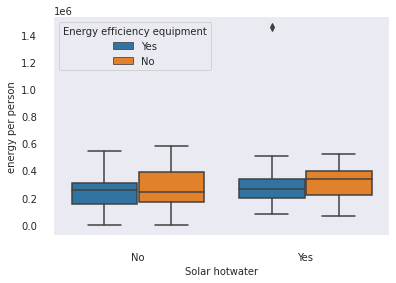

In [ ]:
sns.boxplot(x="Solar hotwater", y="energy per person", hue="Energy efficiency equipment",
            data=df)
sns.despine(offset=10, trim=True)

* Những nơi không có Energy efficiency equipment (Thiết bị tiết kiệm năng lượng) thường sẽ có lượng tiêu thụ năng lượng trên người cao hơn, điều này là rất hợp lý.
* Những nơi không có Solar hotwater:
   + Nếu có Energy efficiency equipment thì lượng tiêu thụ năng lượng trên người có median gần với upper quartile.
   + Nếu không có Energy efficiency equipment thì lượng tiêu thụ năng lượng trên người có median gần với lower quartile.
   + Việc median gần với upper quartile có thể giải thích là khi có Energy efficiency equipment thì tâm lí chung, nhiều người sẽ thoải mái sử dụng năng lượng hơn. Còn khi không có thì sẽ sử dụng năng lượng tiết kiệm hơn dẫn đến median gần với lower quartile. Mặc dù thế, Energy efficiency equipment vẫn giúp tiết kiệm năng lượng mặc dù tiêu xài thoải mái, minh chứng là box màu cam cao hơn box màu xanh. 
* Những nơi có Solar hotwater nhưng không có Energy efficiency equipment. Điều này làm cho lượng năng lượng tiêu thụ sẽ cao hơn, minh chứng là median gần với upper quartile.